In [ ]:
# Import
from keras.datasets import mnist

Read MNIST dataset
Create a function which takes this data, splits it into train and test and tell shape of each dataset

In [ ]:
# prompt: Please give me code to read dataset from mnist and print shape of each dataset

from keras.datasets import mnist

# Read MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create a function which takes this data, splits it into train and test and tell shape of each dataset
def print_shape(x_train, y_train, x_test, y_test):
  print("x_train shape:", x_train.shape)
  print("y_train shape:", y_train.shape)
  print("x_test shape:", x_test.shape)
  print("y_test shape:", y_test.shape)

print_shape(X_train, y_train, X_test, y_test)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Print some sample images , just to look at the dataset

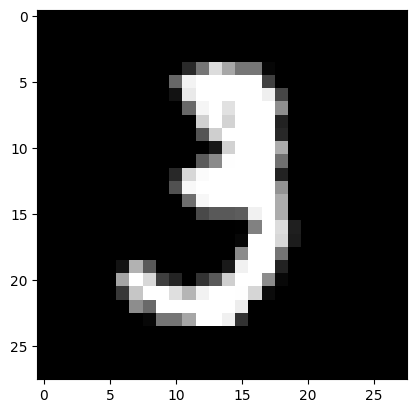

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure
plt.imshow(X_train[10],cmap='gray')
plt.show()

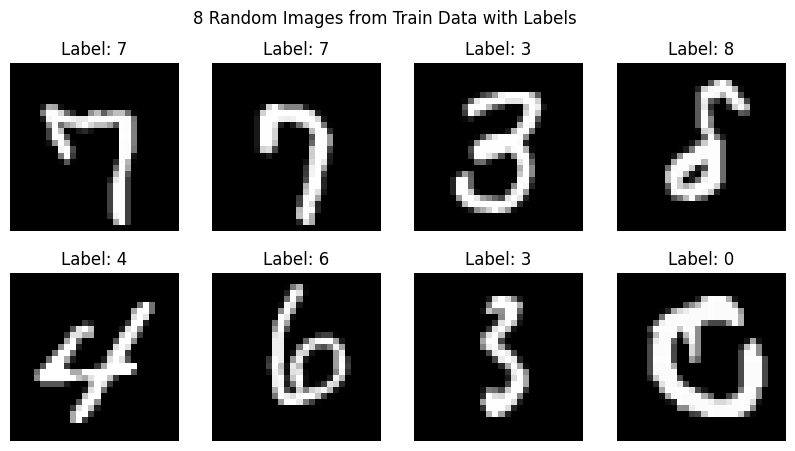

In [ ]:
import random

# Select 8 random indices from the training set
random_indices = random.sample(range(len(X_train)), 8)

# Plot the images and their corresponding labels
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, index in enumerate(random_indices):
    ax = axes[i // 4, i % 4]
    ax.imshow(X_train[index], cmap="gray")
    ax.set_title(f"Label: {y_train[index]}")
    ax.axis("off")

plt.suptitle("8 Random Images from Train Data with Labels")
plt.show()

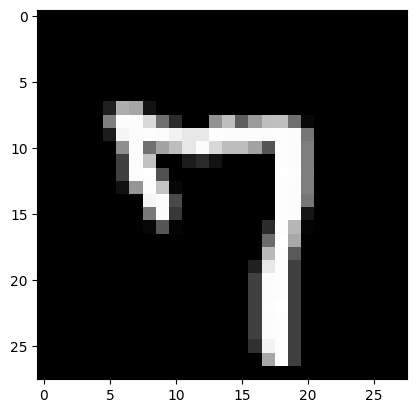

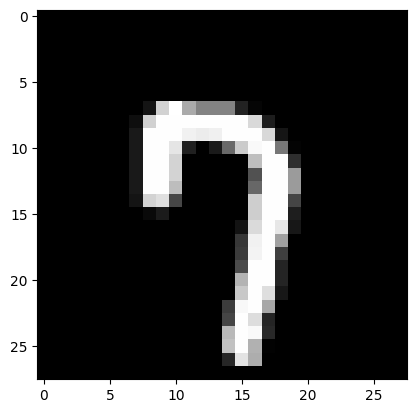

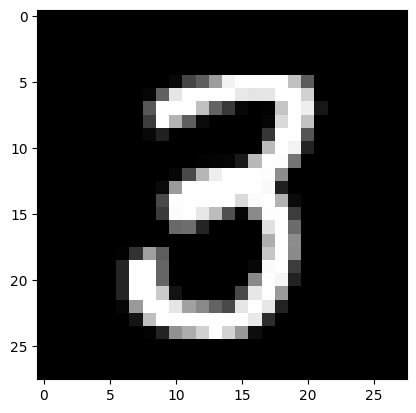

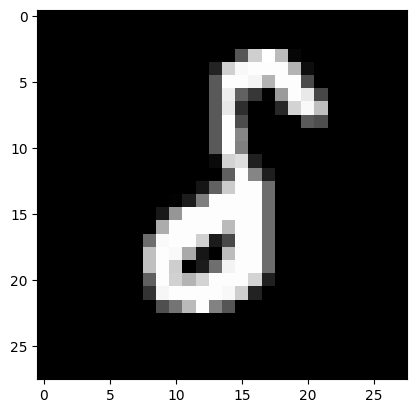

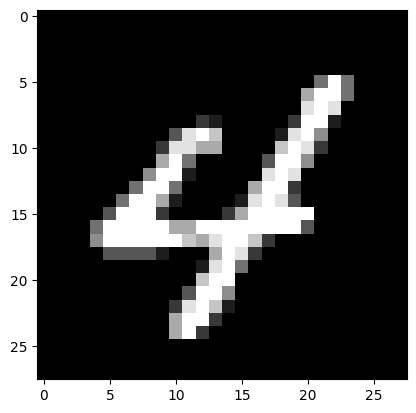

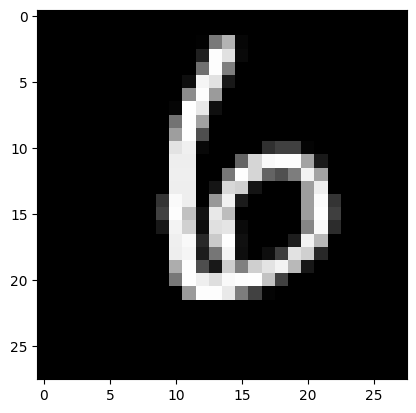

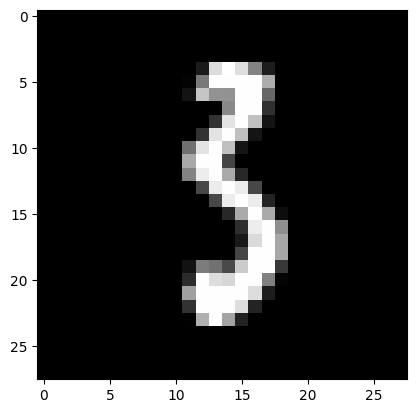

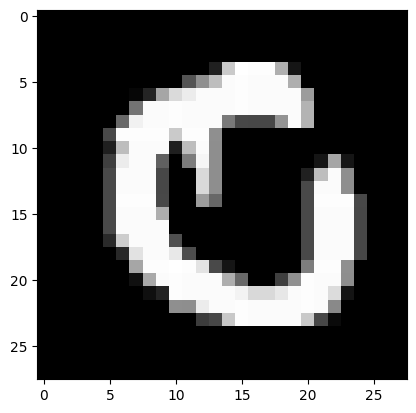

In [ ]:
for i in random_indices:
  plt.imshow(X_train[i],cmap='gray')
  plt.show()

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
import numpy as np

In [ ]:
np.max(X_train[0]),np.min(X_train[0])

(255, 0)

In [ ]:
# Build a ANN model using this
# 28x28 =784
# reshape your data
# scale this data Min-Max scaling

# Model Parameters
NUM_ROWS = 28
NUM_COLS = 28

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))

#Scaling the data
X_train = X_train.astype('float32') / 255 #max scaling
X_test = X_test.astype('float32') / 255

In [ ]:
np.max(X_train[0]),np.min(X_train[0])

(1.0, 0.0)

# Create a simple Neural Network Model which has

Input Layer
3 Hidden Layers - 64,32,16 neurons & uses relu activation
Output Layer ->

model.compile - Use adam optimiser, loss as per , accuracy as a metric

In [ ]:
from keras import models
from keras.layers import Dense, Dropout


In [ ]:
# Build neural network
model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
y_train[2]

4

In [ ]:
from keras.utils import to_categorical
# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:

# Train model
model.fit(X_train, y_train,
          batch_size=10,
          epochs=20,
          validation_data=(X_test, y_test))


Epoch 1/20
6000/6000 [==============================] - 24s 4ms/step - loss: 0.2695 - accuracy: 0.9180 - val_loss: 0.1601 - val_accuracy: 0.9508
Epoch 2/20
6000/6000 [==============================] - 17s 3ms/step - loss: 0.1260 - accuracy: 0.9616 - val_loss: 0.1084 - val_accuracy: 0.9701
Epoch 3/20
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0944 - accuracy: 0.9722 - val_loss: 0.1191 - val_accuracy: 0.9645
Epoch 4/20
6000/6000 [==============================] - 18s 3ms/step - loss: 0.0767 - accuracy: 0.9766 - val_loss: 0.0981 - val_accuracy: 0.9710
Epoch 5/20
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0678 - accuracy: 0.9791 - val_loss: 0.1168 - val_accuracy: 0.9679
Epoch 6/20
6000/6000 [==============================] - 26s 4ms/step - loss: 0.0570 - accuracy: 0.9825 - val_loss: 0.1019 - val_accuracy: 0.9730
Epoch 7/20
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0514 - accuracy: 0.9849 - val_loss: 0.1123 - val_ac

In [ ]:
model = models.Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# Train model
model.fit(X_train, y_train,
          batch_size=10,
          epochs=20,
          validation_data=(X_test, y_test))


Epoch 1/20
6000/6000 [==============================] - 27s 4ms/step - loss: 0.3462 - accuracy: 0.8971 - val_loss: 0.1382 - val_accuracy: 0.9582
Epoch 2/20
6000/6000 [==============================] - 30s 5ms/step - loss: 0.1822 - accuracy: 0.9475 - val_loss: 0.1146 - val_accuracy: 0.9660
Epoch 3/20
6000/6000 [==============================] - 26s 4ms/step - loss: 0.1524 - accuracy: 0.9571 - val_loss: 0.0990 - val_accuracy: 0.9704
Epoch 4/20
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1317 - accuracy: 0.9633 - val_loss: 0.1103 - val_accuracy: 0.9679
Epoch 5/20
6000/6000 [==============================] - 24s 4ms/step - loss: 0.1189 - accuracy: 0.9659 - val_loss: 0.0900 - val_accuracy: 0.9749
Epoch 6/20
6000/6000 [==============================] - 25s 4ms/step - loss: 0.1110 - accuracy: 0.9687 - val_loss: 0.0862 - val_accuracy: 0.9755
Epoch 7/20
6000/6000 [==============================] - 24s 4ms/step - loss: 0.1036 - accuracy: 0.9708 - val_loss: 0.0830 - val_ac


**2. How can you implement this using a CNN - 5 minutes**




In [ ]:
# We don't need to reshape our data
# CNNs are optimised for image input

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [ ]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
del model

In [ ]:
from keras import layers
model = models.Sequential(
    [
        #CNN
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),


        #bridge between CNNS and FC layers
        layers.Flatten(),

        # FC layers
        layers.Dense(16, activation="relu"),
        layers.Dense(10, activation="softmax")


    ]
)



In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_20 (Dense)            (None, 16)              

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 46s 96ms/step - loss: 0.3249 - accuracy: 0.8988 - val_loss: 0.0920 - val_accuracy: 0.9725
Epoch 2/5
469/469 [==============================] - 44s 95ms/step - loss: 0.0770 - accuracy: 0.9771 - val_loss: 0.0492 - val_accuracy: 0.9849
Epoch 3/5
469/469 [==============================] - 44s 95ms/step - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0465 - val_accuracy: 0.9848
Epoch 4/5
469/469 [==============================] - 45s 95ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.0391 - val_accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 45s 96ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0383 - val_accuracy: 0.9882


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04853476583957672
Test accuracy: 0.98580002784729


In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [ ]:
predictions.shape

(10000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
predictions[0]

array([1.3481322e-12, 8.9873907e-08, 3.0843185e-07, 2.6260184e-07,
       7.6317157e-09, 1.5174790e-11, 1.3189108e-20, 9.9999911e-01,
       1.0379321e-08, 7.5616775e-08], dtype=float32)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
np.argmax(predictions[10])

0

In [ ]:
np.argmax(y_test[10])

0

In [ ]:
for idx,i in enumerate(predictions[0]):
    if i == predictions[0].max():
        print(idx)


7
